# Проект по предсказанию токсичности соединений
Что нужно сделать:


1. Проанализировать данные, + за визуализацию
2. Предобработать данные, чтобы улучшить качество модели. + за инсайты, если что-то найдется
3. Обучить модель и провалидировать ее. Метрика: RMSE
4. Проверить модель на test данных и прислать результаты вместе с ноутбуком



## Библиотеки и загрузка данных

rdkit – библиотека для работы с химическими данными.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Загружаем данные
train = pd.read_csv("data\\train.csv")

In [22]:
display(train)

,SMILES,activity
0,OCC=C,5.0
1,CO/N=C(/C(=O)OC)\C1=C(COC2=C(C)C=CC=C2)C=CC=C1,94.0
2,COC(=O)NS(=O)(=O)C1=CC=C(N)C=C1,5.4
3,CCCCC(CC)C(O)=O,-8.2
4,COC(=O)C1=C(CC(C)C)C(C2=NCCS2)=C(N=C1C(F)F)C(F...,26.2
...,...,...
754,CC1=CC2=CC=CN=C2C=C1,43.1
755,C12CC[C@@](O)(C#C)[C@@]1(C)CCC3C4CCC(=O)C=C4CCC23,15.8
756,CCCCNS(=O)(=O)C1=CC=CC=C1,17.8
757,NC1=C(Cl)C(Cl)=NC(C(O)=O)=C1Cl,55.1


## Анализ данных

Здесь будет ваше решение по анализу: графики, числа, визуализации. Если найдете что-то интересное, можно написать текстом.

Text(0, 0.5, 'Количество')

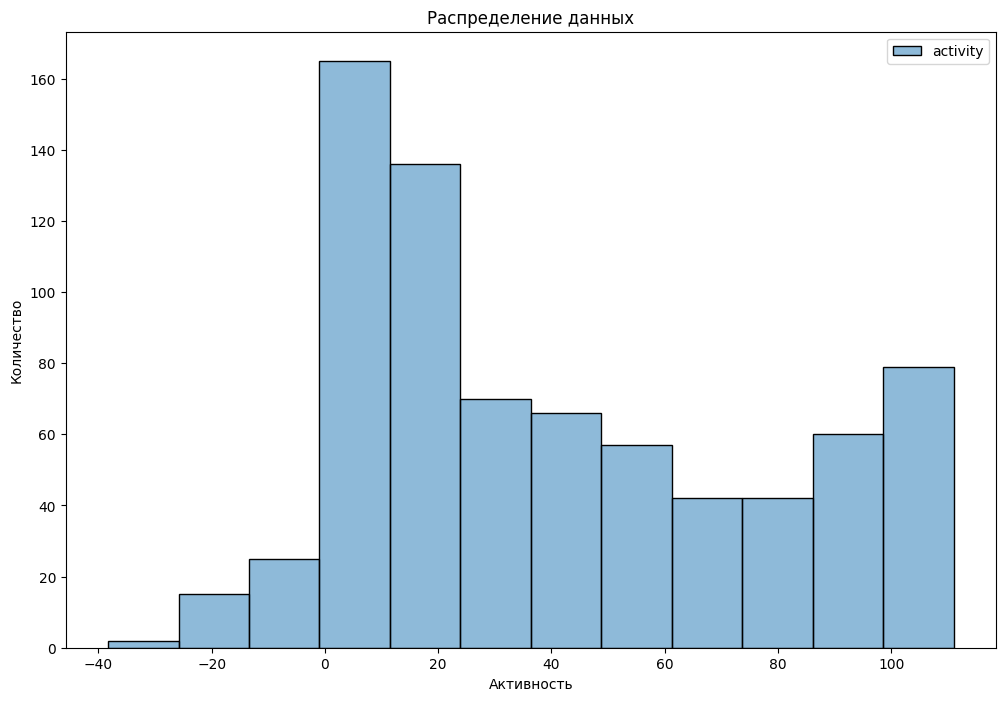

In [23]:
# Визуализируем данные.
plt.figure(figsize=(12,8))
sns.histplot(train)
plt.title('Распределение данных')
plt.xlabel('Активность')
plt.ylabel('Количество')

Видим, что распределение мультимодальное с двумя пиками и смещением влево. 

Text(0.5, 0, 'Активность')

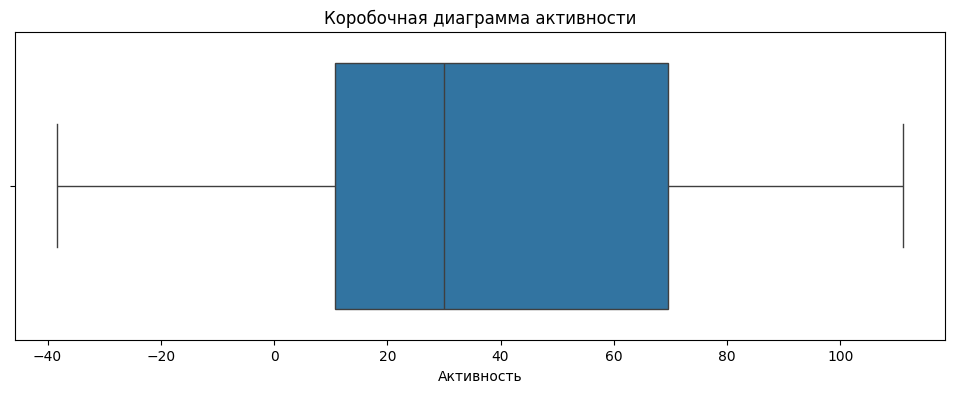

In [24]:
# Строим коробочную диаграмму.
plt.figure(figsize=(12,4))
sns.boxplot(data=train, x='activity')
plt.title('Коробочная диаграмма активности')
plt.xlabel('Активность')

Данные имеют широкий диапазон, с центральным значением около 30 и без явных выбросов.

In [25]:
# Выводим информацию о данных, видим что пропусков нет.
train.info()
print()
# Получаем описательную статистику по данным
print(train.describe(include='object'))
print()
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMILES    759 non-null    object 
 1   activity  759 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB

       SMILES
count     759
unique    759
top     OCC=C
freq        1

         activity
count  759.000000
mean    40.691304
std     36.150662
min    -38.300000
25%     10.750000
50%     30.100000
75%     69.550000
max    111.000000


## Предобработка данных

In [26]:
from rdkit import Chem
from rdkit.Chem import AllChem

SMILES – это форма записи молекулы текстом. Модели не понимают текст (если мы не говорим о специальных моделях), поэтому текст нужно превратить в числа. Один из способов превратить молекулы в числа – это fingerprints.

In [27]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split

# Создаём функцию для превращения текста в числа
def smiles_to_fp(smiles):
    '''Convert SMILES to Morgan fingerprints'''
    return np.array([AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(s), 2, nBits=1024) for s in smiles])
# Делим датасет на данные и вектор правильных ответов
X_train_full = smiles_to_fp(train.SMILES)
y_train_full = train.activity
# Отделяем тренировочный и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
# Отображение размеров наборов данных
print("Размер X_train:", X_train.shape)
print("Размер X_test:", X_test.shape)
print("Размер y_train:", y_train.shape)
print("Размер y_test:", y_test.shape)




[19:34:23] DEPRECATION WARNING: please use MorganGenerator
[19:34:23] DEPRECATION WARNING: please use MorganGenerator
[19:34:23] DEPRECATION WARNING: please use MorganGenerator
[19:34:23] DEPRECATION WARNING: please use MorganGenerator
[19:34:23] DEPRECATION WARNING: please use MorganGenerator
[19:34:23] DEPRECATION WARNING: please use MorganGenerator
[19:34:23] DEPRECATION WARNING: please use MorganGenerator
[19:34:23] DEPRECATION WARNING: please use MorganGenerator
[19:34:23] DEPRECATION WARNING: please use MorganGenerator
[19:34:23] DEPRECATION WARNING: please use MorganGenerator
[19:34:23] DEPRECATION WARNING: please use MorganGenerator
[19:34:23] DEPRECATION WARNING: please use MorganGenerator
[19:34:23] DEPRECATION WARNING: please use MorganGenerator
[19:34:23] DEPRECATION WARNING: please use MorganGenerator
[19:34:23] DEPRECATION WARNING: please use MorganGenerator
[19:34:23] DEPRECATION WARNING: please use MorganGenerator
[19:34:23] DEPRECATION WARNING: please use MorganGenerat

Размер X_train: (607, 1024)
Размер X_test: (152, 1024)
Размер y_train: (607,)
Размер y_test: (152,)


У наших данных слишком много признаков, что может затруднять обучение модели. Попробуем уменьшить размерность с помощью PCA.

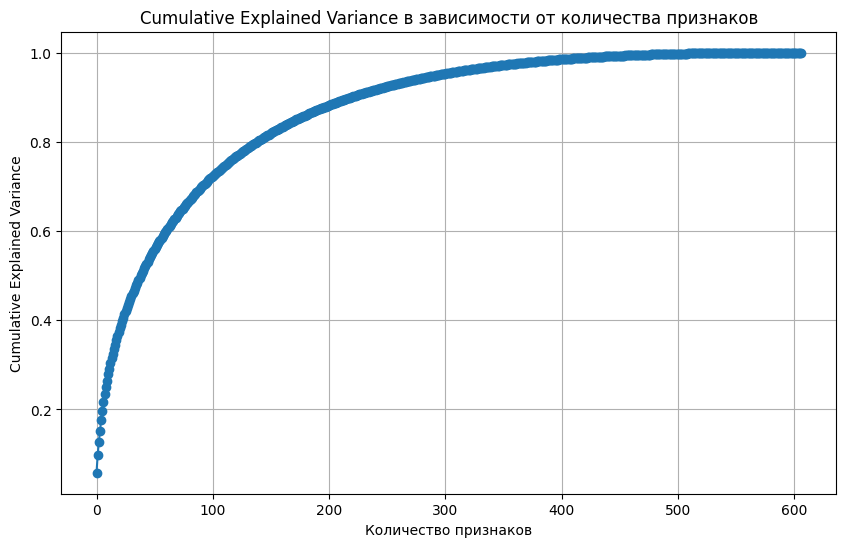

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:

from sklearn.decomposition import PCA

# С помощью метода локтя определим оптимальное количество признаков для понижения размерности.
pca = PCA()
pca.fit(X_train)
explained_variance= pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(explained_variance, marker='o')
plt.xlabel('Количество признаков')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance в зависимости от количества признаков')
plt.grid(True)
plt.show()

print(X_train)


По графику видно, что точке перегиба соответсвует количество признаков около 200.

In [29]:
# Обучение PCA с 200 признаками
pca_200 = PCA(n_components=200)
# Трансформация наших данных - понизим размерность
X_train_200 = pca_200.fit_transform(X_train)
X_test_200 = pca_200.transform(X_test)

X_train_200.shape

(607, 200)

## Обучение модели

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection

In [31]:
# Создаём модель без подобранных параметров
model = RandomForestRegressor()


## Валидация

In [32]:
from sklearn.metrics import mean_squared_error

kf = model_selection.KFold(n_splits=5)

#Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=model, #модель
    X=X_train_200, #матрица наблюдений X
    y=y_train, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring='neg_mean_squared_error', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
display(cv_metrics)


{'fit_time': array([12.56880116, 11.97916102, 12.22967982, 12.22983527, 12.54436755]),
 'score_time': array([0.01202393, 0.01200294, 0.01100278, 0.01098251, 0.01102185]),
 'test_score': array([-983.31880514, -810.13902094, -877.14118804, -793.29575263,
        -763.97000885]),
 'train_score': array([-118.20033574, -136.08218049, -135.69375237, -139.87979964,
        -136.22672708])}

In [33]:
print('RMSE на тренировочной выборке=',-(np.mean(cv_metrics['train_score'])))
print('RMSE на тестовой выборке=',-(np.mean(cv_metrics['test_score'])))

RMSE на тренировочной выборке= 133.216559064489
RMSE на тестовой выборке= 845.5729551201473


Качество модели без подбора параметров нас не устраивает. Нужно сделать подбор гиперпараметров с помощью Randomized Search.

In [34]:
from sklearn.model_selection import RandomizedSearchCV

# Определение параметров для Randomized Search
param_distributions = {
    'n_estimators': [50, 100, 200, 300, 400],  # Количество деревьев
    'max_depth': [None, 10, 20, 30, 40, 50],  # Максимальная глубина деревьев
    'min_samples_split': [2, 5, 10, 15],  # Минимальное количество объектов для разделения узла
    'min_samples_leaf': [1, 2, 4]  # Минимальное количество объектов в листе
}

# Настройка Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=10,  # Количество итераций поиска
    cv=5,  # Количество фолдов в кросс-валидации
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1  # Использование всех ядер
)

# Обучение модели
random_search.fit(X_train_200, y_train)

# Вывод лучших параметров и соответствующего RMSE
best_params = random_search.best_params_
best_rmse = np.sqrt(-random_search.best_score_)

print("Лучшие параметры:", best_params)
print("Лучший RMSE:", best_rmse)


Лучшие параметры: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Лучший RMSE: 28.76062345395803


Random Search помог значительно улучшить качество модели! Проверим обученную модель на тестовых данных.

In [35]:
# Оценка модели на тестовых данных
y_pred = random_search.best_estimator_.predict(X_test_200)
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

print("RMSE на тестовом наборе данных:", test_rmse)

RMSE на тестовом наборе данных: 27.14105795394236


Качество модели на тестовых данных нас также устраивает!

In [39]:
# Загрузим новые данные и выполним их предобработку
new_data = pd.read_csv('data\\test_only_smiles.csv')
# Переведём из текста в цифры с помощью ранее созданной функции
X_new = smiles_to_fp(new_data.SMILES)
# Уменьшим размерность
X_new_200 = pca_200.transform(X_new)
X_new_200.shape

[19:43:35] DEPRECATION WARNING: please use MorganGenerator
[19:43:35] DEPRECATION WARNING: please use MorganGenerator
[19:43:35] DEPRECATION WARNING: please use MorganGenerator
[19:43:35] DEPRECATION WARNING: please use MorganGenerator
[19:43:35] DEPRECATION WARNING: please use MorganGenerator
[19:43:35] DEPRECATION WARNING: please use MorganGenerator
[19:43:35] DEPRECATION WARNING: please use MorganGenerator
[19:43:35] DEPRECATION WARNING: please use MorganGenerator
[19:43:35] DEPRECATION WARNING: please use MorganGenerator
[19:43:35] DEPRECATION WARNING: please use MorganGenerator
[19:43:35] DEPRECATION WARNING: please use MorganGenerator
[19:43:35] DEPRECATION WARNING: please use MorganGenerator
[19:43:35] DEPRECATION WARNING: please use MorganGenerator
[19:43:35] DEPRECATION WARNING: please use MorganGenerator
[19:43:35] DEPRECATION WARNING: please use MorganGenerator
[19:43:35] DEPRECATION WARNING: please use MorganGenerator
[19:43:35] DEPRECATION WARNING: please use MorganGenerat

(253, 200)

In [54]:
# Предскажем вектор правильных ответов и округлим значения c помощью нашей модели
y_new_pred = random_search.best_estimator_.predict(X_new_200)
y_new_pred = np.round(y_new_pred, 1)
display(y_new_pred)

array([12.8, 46.6, 51.3, 15.8, 50.1, 24.9, 45.1, 40. ,  9.8, 27.5, 33.2,
       45.4,  8.7, 44.7, 49.5, 59.6, 18.9, 43.2, 18. , 24.8, 64.6, 17.1,
       17.3, 30.8, 16.4, 16.2, 51.1, 44.5, 27.1, 31.1, 61.9, 20. , 39.5,
       32.1, 39.3, 27.4, 30.7, 47.6, 42.6, 19.2, 32.7, 17.6, 33.8, 36.1,
       30.4, 38.7, 40.6, 40.8, 41.1, 33.1, 45.9, 46.7, 47.6, 34.8, 53. ,
        9.7, 21.3, 23. , 39.4, 34.6, 47.1, 40.3, 20.2, 41.6, 67.2, 63.1,
       30.2, 52.6, 51.6, 65.2, 42. , 63.8, 63.7, 32.3, 47.8, 72.7, 32.4,
       52.4, 30.2, 33.4, 39.3, 56.8, 29.1, 49.4, 29.5, 39.1, 38.8, 43. ,
       64. , 49.2, 29.6, 50.6, 35.8, 43.2, 54.5, 59.5, 51.4,  9. , 50. ,
       14.9, 36.9, 39.3, 11.6, 43.8, 40.8, 26.2,  8.7, 66.9, 52.4, 51.5,
       22.4, 18.6, 32.5, 52. , 49. , 56.5, 13.5, 46.7, 45.6, 52.8, 55.8,
       52.5, 52.1, 18.1, 27.5, 36.4, 29.3, 14.3, 43. , 23.7, 39.9, 46.3,
       58. , 21.3, 39.1, 28.1, 27.7, 27. , 41.2, 12.2, 45.1, 15.4, 48.3,
       14.7, 21.3, 28.4, 41.7, 38.3, 33.3, 29. , 10

In [55]:
new_data['predicted_activity'] = y_new_pred
display(new_data)

,SMILES,predicted_activity
0,CC(O)CCO,12.8
1,CCCCOCCOC(=O)COC1=C(Cl)C=C(Cl)C=C1,46.6
2,CO/N=C(/C1=NOCCO1)\C2=C(OC3=NC=NC(OC4=CC=CC=C4...,51.3
3,C=CC(=O)NCNC(=O)C=C,15.8
4,CC1=CC(=CC=C1)[N+]([O-])=O,50.1
...,...,...
248,OC(=O)/C=C/C1=CC=CC=C1,38.2
249,CCOC(=O)C(C)OC(=O)C1=C(C=CC(OC2=C(Cl)C=C(C=C2)...,61.9
250,CCO[Si](CCCNC(N)=O)(OCC)OCC,20.9
251,ON=C1CCCCC1,17.2
